![alt text](https://i.imgur.com/1WaY7aA.png)

---



---



# Lab 5.3 
# *Support Vector Machines*

SVMs use linear algebra to find an (n-1)-dimensional boundary that separates classes within an n-dimensional space. In practical terms, this technique provides a conceptually simple way to predict class membership from a set of features. 

The standard (linear) SVM is immediately applicable to linear classification problems. Furthermore, by applying transformations to the feature space it is possible to tackle nonlinear classificaiton problems. These transforms are called *kernels*.

In [1]:
import numpy as np
from sklearn import svm
import pandas as pd

%matplotlib inline
df = pd.read_csv('/Users/hieu/Desktop/hillDSIAGit/DSIA-SYD-FT-Projects-201907/hieu/LinearRegressionHomework/breast-cancer-wisconsin-data.csv')

## Linear SVM

Here we will apply a linear kernal to separate two clusters in 2D. This means our solution hyperplane will be a straight line in the x-y plane.  

We will use the `SVC` (support vector classification) algorithm from the `svm` library.

Scikit-learn has a handy function for generating synthetic data in clusters:

In [20]:
# # # Create 40 separable points:
# # X, y = make_blobs(n_samples = 40, centers = 2, random_state = 6)
# df = df.drop(['id', 'radius_mean', 'perimeter_mean',
#        'area_mean',  'compactness_mean', 'concavity_mean',
#        'concave points_mean', 'fractal_dimension_mean',
#        'radius_se', 'texture_se', 'perimeter_se', 'area_se', 
#        'compactness_se', 'concave points_se', 'radius_worst', 
#        'perimeter_worst', 'area_worst',
#        'compactness_worst', 'concavity_worst', 'concave points_worst',
#        'symmetry_worst', 'Unnamed: 32'], axis=1)

# # df = df.drop(['texture_mean','smoothness_mean',  'symmetry_mean', 
# #         'smoothness_se', 'symmetry_se','fractal_dimension_se', 'texture_worst',
# #      'smoothness_worst', 'fractal_dimension_worst', 'Unnamed: 32'], axis=1)
X = df[['perimeter_mean','area_mean']] #2 classification so I selected from heatmap in DSIA_Lab_5_3_1HieuDoing 

In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
y = LabelEncoder().fit_transform(df['diagnosis']) #LabelEncoder turn M & B into 1 and 0 
# X =df.drop(['diagnosis'], axis=1)
X.shape, y.shape

((569, 2), (569,))

In [22]:
X.columns

Index(['perimeter_mean', 'area_mean'], dtype='object')

X is a 2-column matrix representing 569 (x,y) pairs and y is the cluster membership vector.

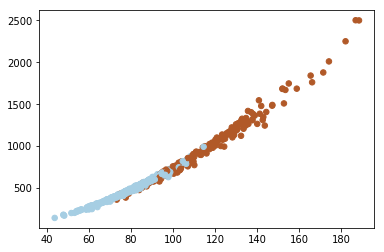

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c = y, s = 30, cmap = plt.cm.Paired)  # cmap is the colour map for c
plt.show()

Like many Scikit-learn algorithms, svm.SVC applies regularisation by default. For this demo, we will train the model with regularisation suppressed:

In [25]:
# fit the model, without regularisation (make C large):
clf = svm.SVC(kernel = 'linear', C = 1000)
clf.fit(X, y)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

This will plot the data with the solution hyperplane and dividing boundaries superimposed. Make sure to look up any methods you aren't familiar with and add some comments to explain what they are doing.

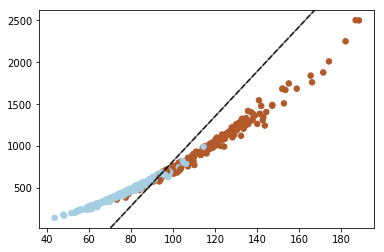

In [26]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c = y, s = 30, cmap = plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors = 'k', levels = [-1, 0, 1], alpha = 0.5, linestyles = ['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s = 100, linewidth = 1, facecolors = 'none')
plt.show()

### Nonlinear SVM

Here we will apply a nonlinear kernel to separate two classes where a linear kernel would fail. For this we will use the `NuSVC` algorithm from the `svm` library.

Generating this dataset relies on a logical trick to classify the points by which quadrant they are in:

In [ ]:
# np.random.seed(0)
# X = np.random.randn(300, 2)
# y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
# plt.scatter(X[:, 0], X[:, 1], c = y, s = 30, cmap = plt.cm.Paired)

For this demo we will train the model using default parameters, so we instantiate an `svm.NuSVC` with no arguments:

In [30]:
# fit the model
clf = svm.NuSVC()
clf.fit(X, y)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


NuSVC(cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
   kernel='rbf', max_iter=-1, nu=0.5, probability=False, random_state=None,
   shrinking=True, tol=0.001, verbose=False)

The next visualisation requires some tricky coding. The `svm.NuSVC` class has a `decision_function` method that we can use to create a heatmap to show how the likelihood of class membership varies over the 2D feature space. The Numpy `meshgrid` function is useful for creating our 2D spatial grid, but the `decision_function` method need the the grid to be passed as a 2D array with x-values in the 1st column and y-values in the second:

/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linetypes'
  s)


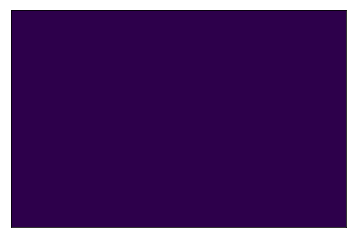

In [32]:
# Plot the decision function for each datapoint on the grid ...

# create a fine grid on which to calculate the function:
xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))

# use ravel() to transform each array into 1 contiguous vector (row-wise or column-wise);
# then use c_[] to create an array with one column for each or these two vectors;
# then apply the decision_function() to compute the distance of each sample X to the separating hyperplane:
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])  

# finally, change the shape of the result back into that of the original grid:
Z = Z.reshape(xx.shape)  # put results back into original geometry

# plot Z as a heatmap:
plt.imshow(Z, interpolation = 'nearest',
           extent = (xx.min(), xx.max(), yy.min(), yy.max()), aspect = 'auto',
           origin = 'lower', cmap = plt.cm.PuOr_r)

# plot decision boundaries:
contours = plt.contour(xx, yy, Z, levels = [0], linewidths = 2, linetypes = '--')

# plot original data points:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 30, c = y, cmap = plt.cm.Paired, edgecolors = 'k')

# scaling, final rendering:
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

## === End ===

>

>

>



---



---



> > > > > > > > > © 2019 Data Science Institute of Australia


---



---



